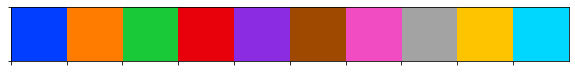

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# try different palette for plotting
# sns.set_palette(sns.color_palette("Paired", 20))
# sns.set_palette(sns.diverging_palette(255, 133, l=60, n=16, center="dark"))
colors3 = ["#9d6d00", "#903ee0", "#11dc79", "#f568ff", "#419500", "#013fb0", 
          "#f2b64c", "#007ae4", "#ff905a", "#33d3e3", "#9e003a", "#019085", 
          "#950065", "#afc98f", "#ff9bfa", "#83221d", "#01668a", "#ff7c7c", 
          "#643561", "#75608a"]
palette1 = sns.color_palette("BuGn", 6)[::-1][:4] \
           + sns.color_palette("OrRd", 6)[1:] \
           + sns.color_palette("PuBu", 6)[::-1][:-2] \
           + sns.color_palette("RdGy", 10)[6:]
# sns.set_palette(palette1)
sns.set_palette("bright",10)
sns.palplot(sns.color_palette())

In [2]:
# source https://github.com/pcm-dpc/COVID-19/
# transpose matrices for better data handling
! curl https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv > ../external_data/dpc-covid19-ita-regioni.csv

# confirmed COVID-19 positive cases for Italy
data = pd.read_csv("../external_data/dpc-covid19-ita-regioni.csv")
data.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 51  142k   51 75405    0     0  75405      0  0:00:01  0:00:01 --:--:-- 39232
100  142k  100  142k    0     0  73034      0  0:00:02  0:00:02 --:--:-- 68738


,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10,NaN,NaN,NaN
5,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148,NaN,NaN,NaN
6,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58,NaN,NaN,NaN
7,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124,NaN,NaN,NaN
8,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1,NaN,NaN,NaN
9,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463,NaN,NaN,NaN


In [3]:
# region_names = data["denominazione_regione"].unique()
dates = data["data"].unique()
conf = pd.DataFrame(columns = ["data"])
conf["data"] = dates
deaths = pd.DataFrame(columns = ["data"])
deaths["data"] = dates
tests = pd.DataFrame(columns = ["data"])
tests["data"] = dates

In [4]:
for name, group in data.groupby('denominazione_regione'):
    conf = conf.merge(group[["totale_casi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    conf.rename(columns={"totale_casi": name}, inplace=True)
    deaths = deaths.merge(group[["deceduti","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    deaths.rename(columns={"deceduti": name}, inplace=True)
    tests = tests.merge(group[["tamponi","data"]], on='data', how='outer', suffixes=('_1', '_2'))
    tests.rename(columns={"tamponi": name}, inplace=True)
    
conf.set_index('data', inplace=True)
conf.index = pd.to_datetime(conf.index).date
deaths.set_index('data', inplace=True)
deaths.index = pd.to_datetime(deaths.index).date
tests.set_index('data', inplace=True)
tests.index = pd.to_datetime(tests.index).date

conf.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Bolzano,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto
2020-04-25,2832,361,1088,4299,24209,2903,6224,7301,71969,6058,...,2476,3838,24426,3912,1271,3020,9015,1366,1100,17391
2020-04-26,2859,366,1089,4331,24450,2917,6309,7488,72889,6111,...,2481,3894,24820,3948,1280,3055,9147,1368,1106,17471
2020-04-27,2874,366,1096,4349,24662,2977,6392,7642,73479,6127,...,2496,3995,25098,3958,1283,3085,9179,1370,1111,17579
2020-04-28,2899,366,1097,4380,24914,2995,6467,7772,74348,6175,...,2498,4025,25450,3980,1285,3120,9231,1379,1119,17708
2020-04-29,2923,366,1102,4410,25177,3010,6545,7889,75134,6210,...,2507,4069,25861,4029,1290,3140,9292,1391,1124,17825


In [5]:
# select only countries with > 200 positive COVID-19 cases
contries_ordered = conf.max().sort_values(ascending=False)
print(contries_ordered[:10])

# sort columns by total number of positive cases
# # conf = conf.sort_values(conf.last_valid_index(), axis=1, ascending=False)
# deaths = deaths.sort_values(deaths.last_valid_index(), axis=1, ascending=False)
# recover = recover.sort_values(recover.last_valid_index(), axis=1, ascending=False)

Lombardia         75134
Piemonte          25861
Emilia-Romagna    25177
Veneto            17825
Toscana            9292
Liguria            7889
Lazio              6545
Marche             6210
Campania           4410
P.A. Trento        4069
dtype: int64


In [6]:
# latest number of cases by region
print(conf.max())

Abruzzo                   2923
Basilicata                 366
Calabria                  1102
Campania                  4410
Emilia-Romagna           25177
Friuli Venezia Giulia     3010
Lazio                     6545
Liguria                   7889
Lombardia                75134
Marche                    6210
Molise                     297
P.A. Bolzano              2507
P.A. Trento               4069
Piemonte                 25861
Puglia                    4029
Sardegna                  1290
Sicilia                   3140
Toscana                   9292
Umbria                    1391
Valle d'Aosta             1124
Veneto                   17825
dtype: int64


In [7]:
# remove Cruise Ship
# conf.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)
# deaths.drop(list(conf.filter(regex = "Cruise")), inplace=True)

In [8]:
def make_plot(dataset="", contries_ordered="", plot_countries_opt=1,
              nrow=2,ncol=2,plot_countries_option = 1, title="", 
              xlabel="", ylabel="", logy=False, logx=False,
             ymin=0, ymax=1, xmin=0, xmax=1):
    count=0
    fig, axes = plt.subplots(nrows=nrow, ncols=ncol)

    for r in range(nrow):
        for c in range(ncol):
            if plot_countries_opt == 1:
                plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered)].index
            else:
                plot_countries = contries_ordered[count*5:(count+1)*5 if count<3 else len(contries_ordered)]
                
            dataset[plot_countries].plot(logy=logy, logx=logx, grid=True, ax=axes[r,c], title=title, figsize = (20,10./2*nrow))
            axes[r,c].set_xlabel(xlabel, fontsize=15)
            axes[r,c].set_ylabel(ylabel, fontsize=15)
            current_ymin, current_ymax = axes[r,c].get_ylim()
            current_xmin, current_xmax = axes[r,c].get_xlim()
            if ymin != 0.0 and ymin > current_ymin:
                axes[r,c].set_ylim([ymin,axes[r,c].get_ylim()[1]])
            if ymax != 1.0 and ymax < current_ymax:
                axes[r,c].set_ylim([axes[r,c].get_ylim()[0],ymax])
            if xmin != 0.0 and xmin > current_xmin:
                axes[r,c].set_xlim([xmin,axes[r,c].get_xlim()[1]])
            if xmax != 1.0 and xmax < current_xmax:
                axes[r,c].set_xlim([axes[r,c].get_xlim()[0],xmax])
            count+=1

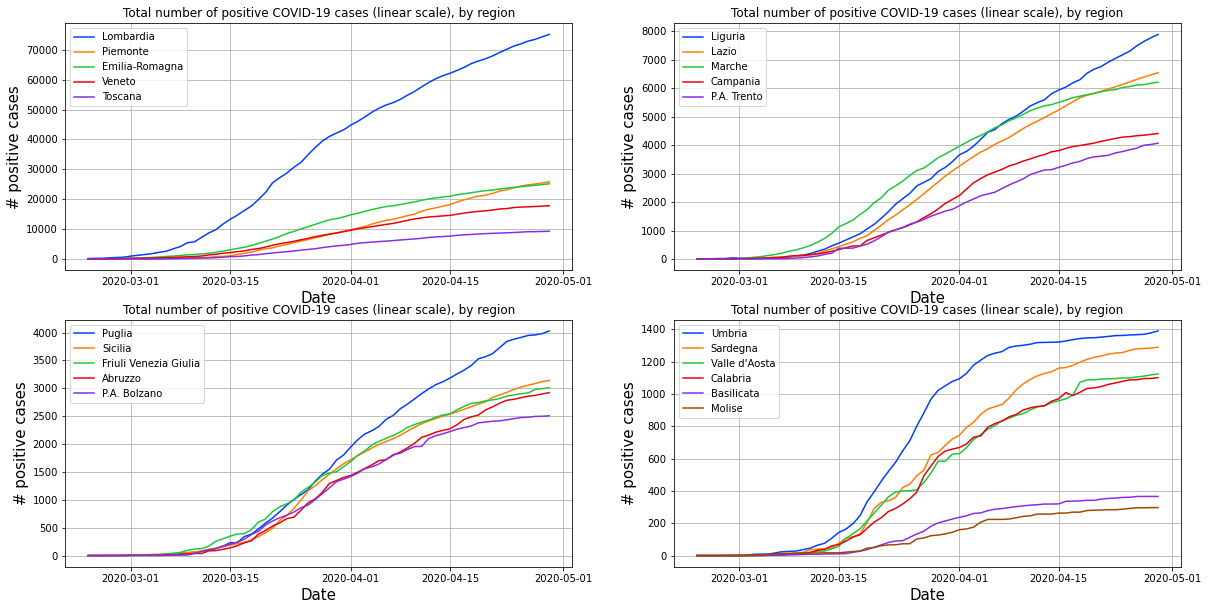

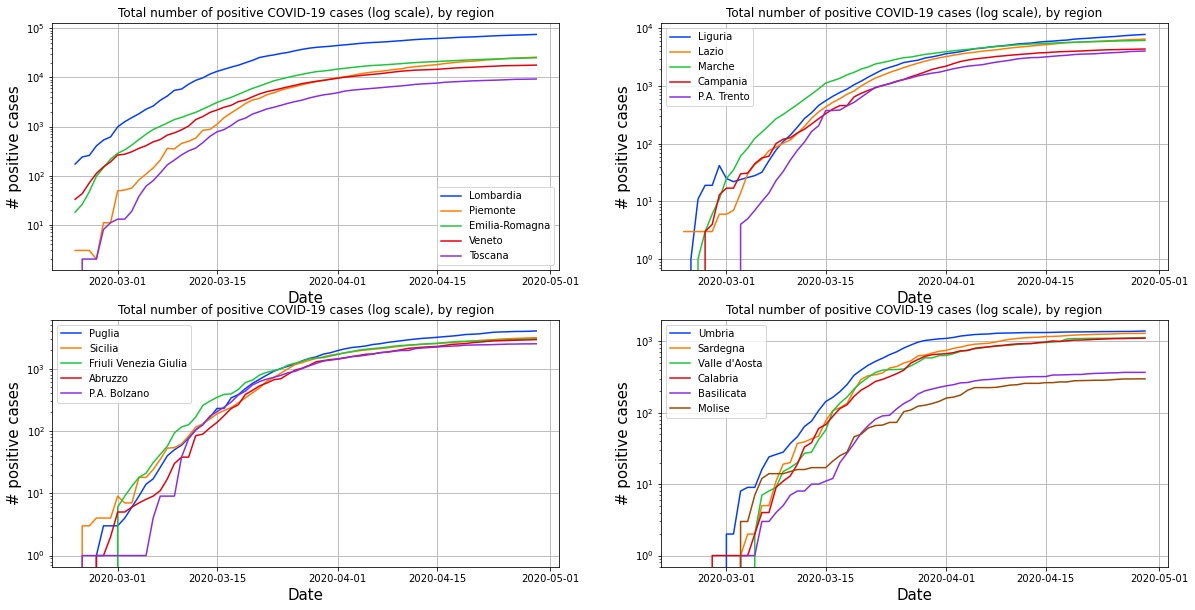

In [9]:
make_plot(dataset=conf, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (linear scale), by region',
          xlabel="Date", ylabel="# positive cases")

make_plot(dataset=conf, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of positive COVID-19 cases (log scale), by region',
          xlabel="Date", ylabel="# positive cases",
         logy=True)

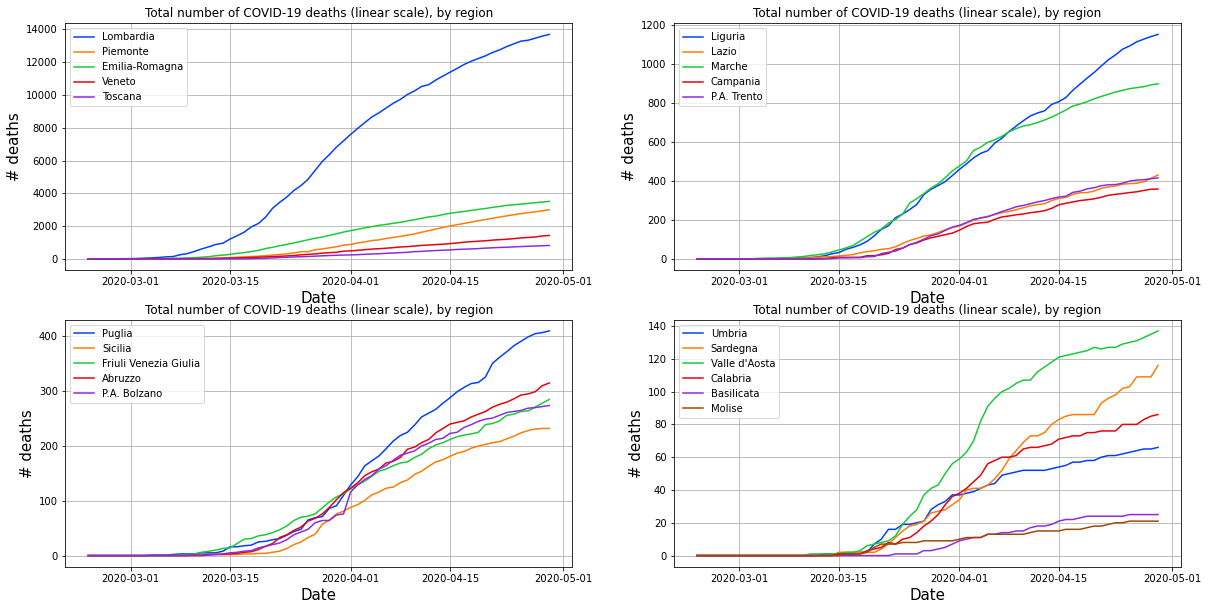

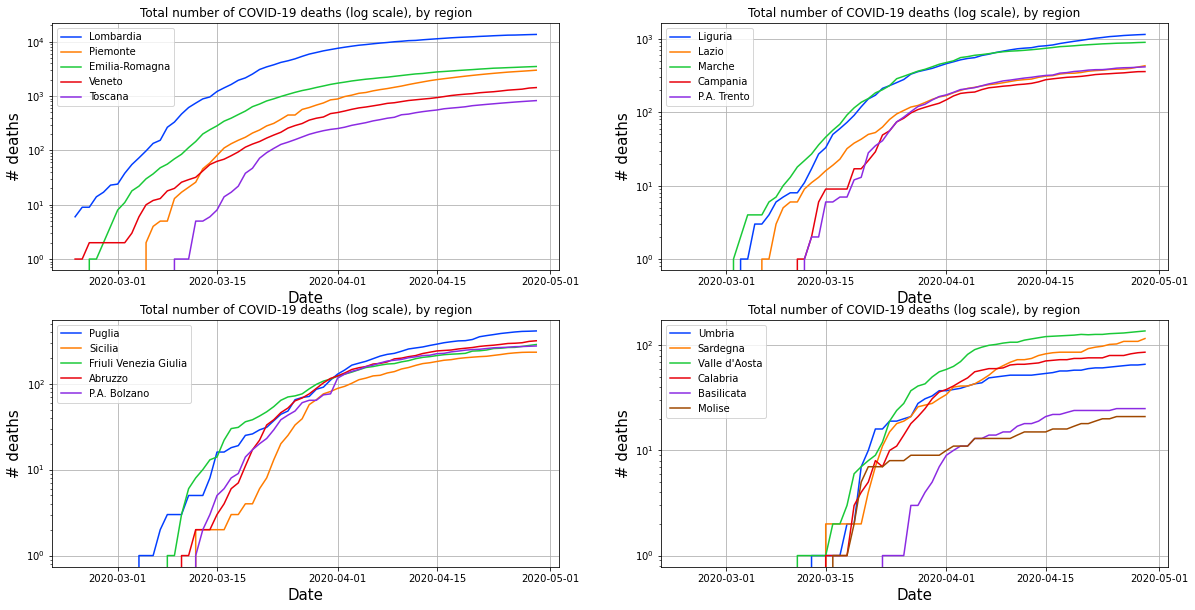

In [10]:
make_plot(dataset=deaths, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of COVID-19 deaths (linear scale), by region',
          xlabel="Date", ylabel="# deaths")

make_plot(dataset=deaths, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Total number of COVID-19 deaths (log scale), by region',
          xlabel="Date", ylabel="# deaths",
         logy=True)

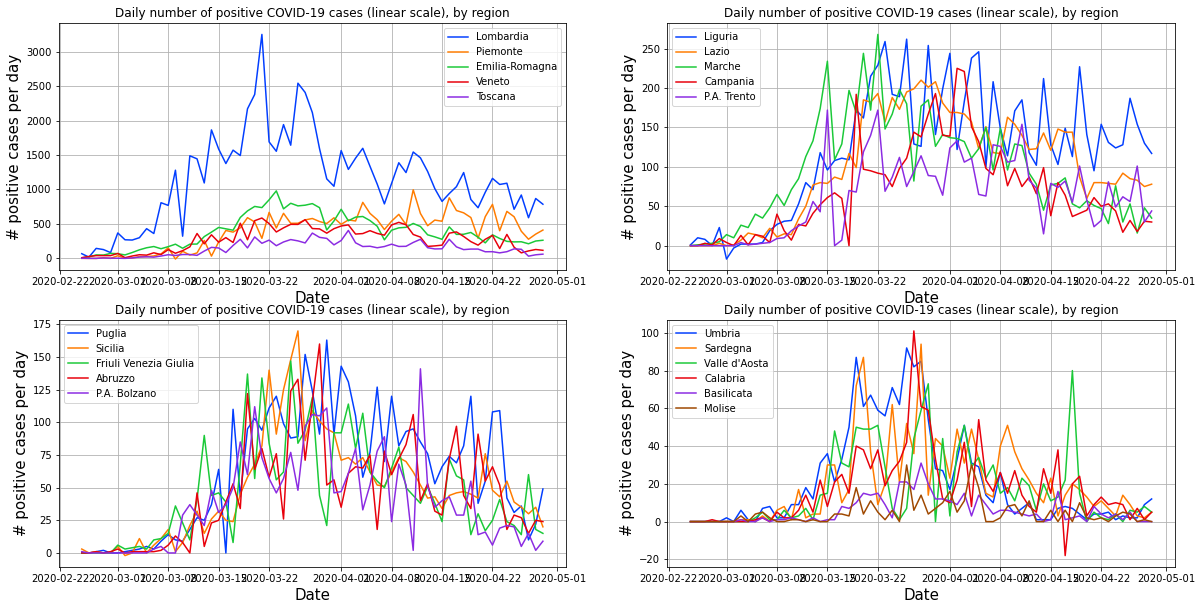

In [11]:
conf_daily = conf - conf.shift(1)

make_plot(dataset=conf_daily, nrow=2,ncol=2, contries_ordered=contries_ordered, 
          title='Daily number of positive COVID-19 cases (linear scale), by region',
          xlabel="Date", ylabel="# positive cases per day")

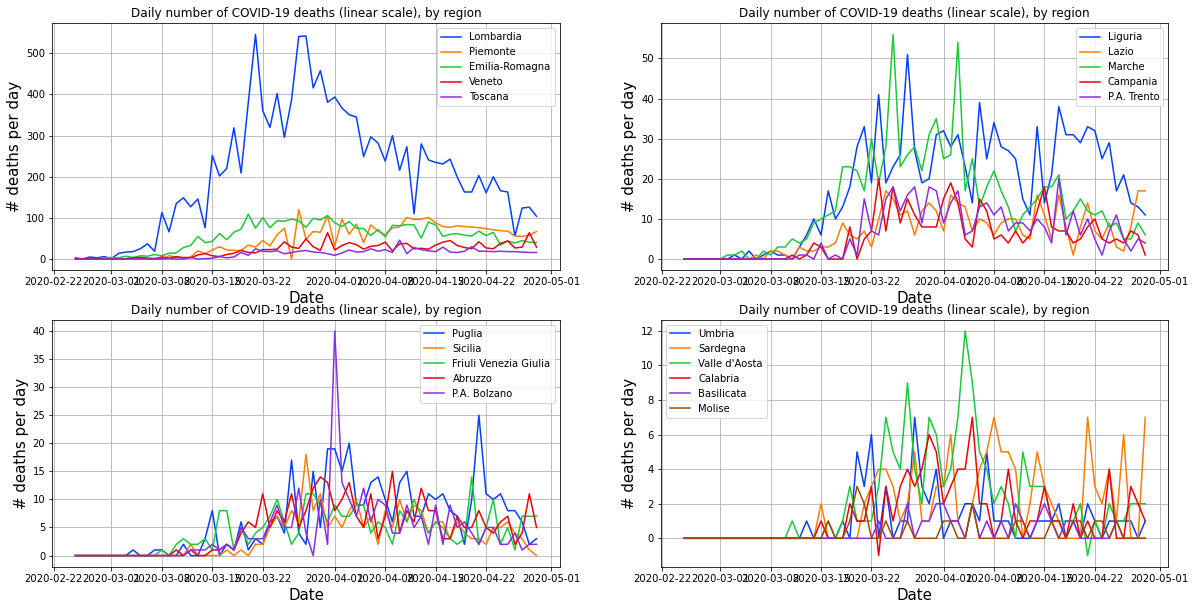

In [12]:
deaths_daily = deaths - deaths.shift(1)

make_plot(dataset=deaths_daily, nrow=2,ncol=2, contries_ordered=contries_ordered, 
          title='Daily number of COVID-19 deaths (linear scale), by region',
          xlabel="Date", ylabel="# deaths per day")

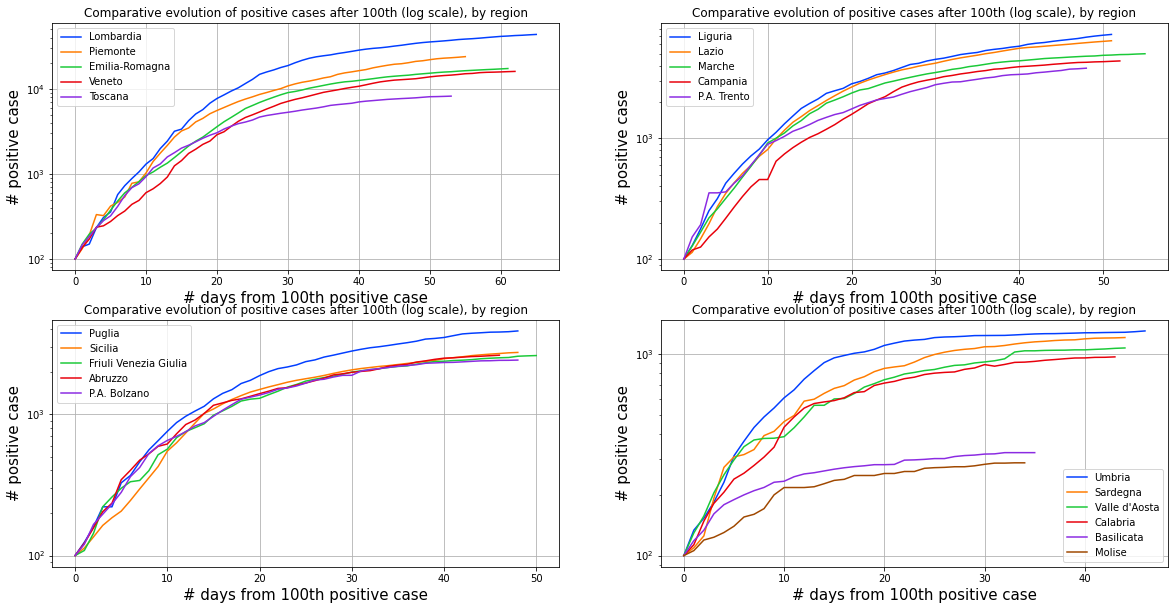

In [13]:
count_after = 100
conf_align_start = conf[conf > count_after]
conf_align_start = conf_align_start.apply(lambda x: pd.Series(x.dropna().values))
conf_align_start = conf_align_start.loc[:].div(conf_align_start.iloc[0][:]/count_after) # normalize to same start

make_plot(dataset=conf_align_start, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='Comparative evolution of positive cases after 100th (log scale), by region',
          xlabel="# days from 100th positive case", ylabel="# positive case",
         logy=True)

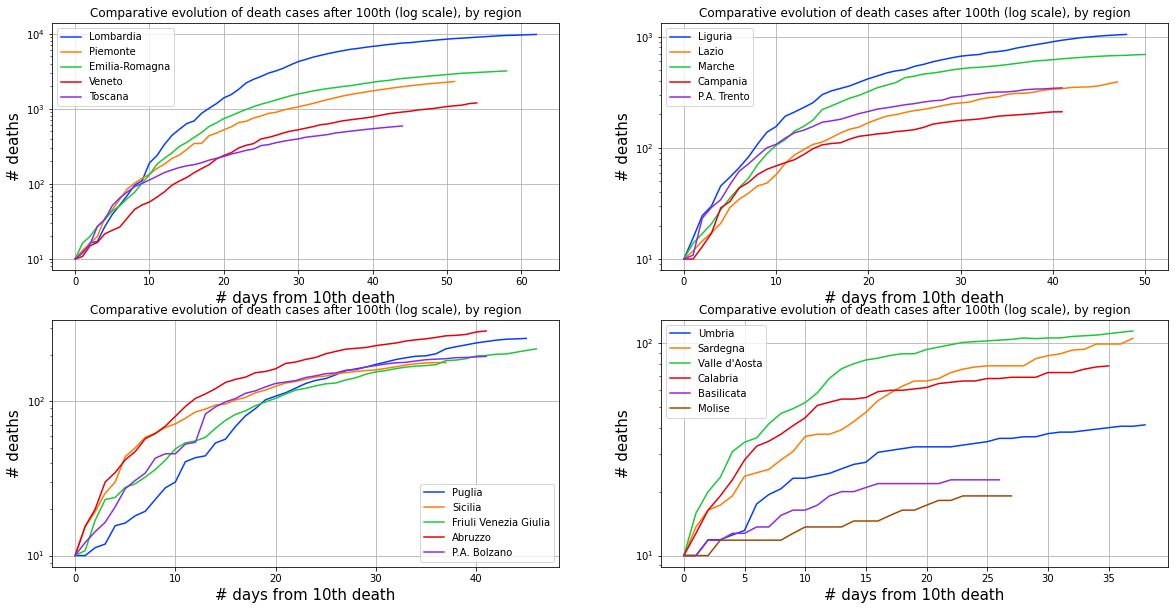

In [14]:
count_after = 10
deaths_align_start = deaths[deaths > count_after] 
deaths_align_start = deaths_align_start.apply(lambda x: pd.Series(x.dropna().values))
deaths_align_start = deaths_align_start.loc[:].div(deaths_align_start.iloc[0][:]/count_after)

make_plot(dataset=deaths_align_start, nrow=2,ncol=2, contries_ordered=contries_ordered, 
          title='Comparative evolution of death cases after 100th (log scale), by region',
          xlabel="# days from 10th death", ylabel="# deaths",
          logy=True)

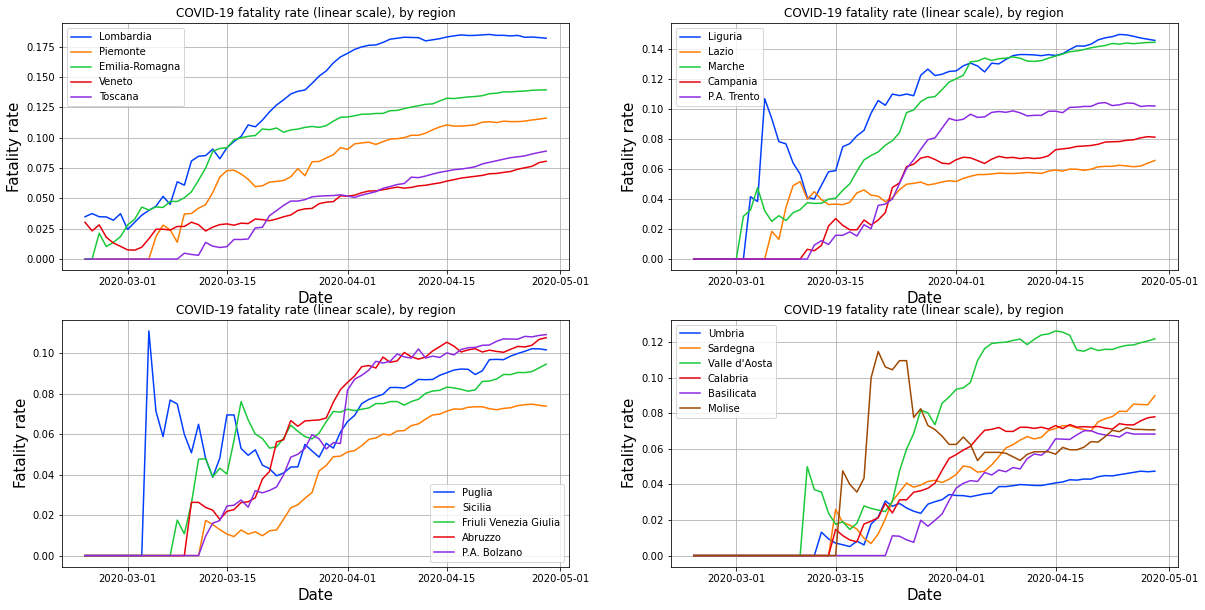

In [15]:
fatality = deaths.divide(conf.replace(0, 1))

make_plot(dataset=fatality, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='COVID-19 fatality rate (linear scale), by region',
          xlabel="Date", ylabel="Fatality rate")

In [16]:
# retrieve population information
# source http://dati-censimentopopolazione.istat.it/Index.aspx?lang=en
population = pd.read_csv("../external_data/DICA_POP_RESPRE_Data_9d65c5fb-6eaa-413c-a013-61a8ad3bce06.csv", encoding = "ISO-8859-1")

In [17]:
# rename population country names that don't match COVID-19 data
# population = population.replace('Emilia-Romagna', 'Emilia Romagna')
population = population.replace('Friuli-Venezia Giulia', 'Friuli Venezia Giulia')
population = population.replace("Valle d'Aosta / Vallée d'Aoste", "Valle d\'Aosta")
print(population["Territory"])

0       Bologna
1       Bologna
2       Bologna
3       Bologna
4       Bologna
         ...   
3397    Trieste
3398    Venezia
3399    Venezia
3400     Verona
3401     Verona
Name: Territory, Length: 3402, dtype: object


In [18]:
population = population[(population["Territory"].isin(set(list(conf.columns.values)))) & 
                       (population["Data type"] == "present population (absolute values)") &
                       (population["Gender"] == "total") &
                       (population["Age"] == "total") ]
population = population[["Territory","0"]].transpose()
population.columns = population.iloc[0]
population = population.iloc[1:]
population = population.loc[:,~population.columns.duplicated()]

In [19]:
# create copy
conf_no_norm = conf.copy()

# concatenate dataset
conf_population_norm = pd.concat([population,conf])
conf_population_norm.head()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia-Romagna,Toscana,Umbria,Marche,...,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna,P.A. Bolzano,P.A. Trento
0,4.39384e+06,128664,1.60573e+06,9.80737e+06,4.95495e+06,1.23702e+06,4.44907e+06,3.76008e+06,917784,1.59126e+06,...,1.31404e+06,308967,5.84041e+06,4.09045e+06,573458,1.93658e+06,5.1511e+06,1.64133e+06,NaN,NaN
2020-02-24,3,0,0,172,33,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0.0,0.0
2020-02-25,3,0,1,240,43,0,26,2,0,0,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-26,3,0,11,258,71,0,47,2,0,1,...,0,0,0,0,0,0,3,0,1.0,0.0
2020-02-27,2,0,19,403,111,0,97,2,0,3,...,1,0,3,1,0,0,4,0,1.0,0.0


In [20]:
# divide cases rows by population/10/1e3 row to obtain number of cases per 1e4 persons
conf_population_norm = conf_population_norm.loc[:].div(conf_population_norm.iloc[0][:]/10/1e3)

In [21]:
# remove population row
conf_population_norm = conf_population_norm.iloc[1:]
conf_population_norm.dropna(axis=1, inplace=True)
conf_population_norm.tail()

,Piemonte,Valle d'Aosta,Liguria,Lombardia,Veneto,Friuli Venezia Giulia,Emilia-Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
2020-04-25,55.5915,85.494,45.4685,73.3826,35.0982,23.4676,54.4137,23.9756,14.8837,38.0703,10.9587,21.5518,9.45085,7.36079,9.56374,6.29514,5.61816,5.86283,7.74372
2020-04-26,56.4882,85.9603,46.6331,74.3206,35.2597,23.5808,54.9553,24.3266,14.9055,38.4034,11.1084,21.7572,9.58031,7.41558,9.65175,6.38233,5.62332,5.93078,7.79855
2020-04-27,57.1209,86.3489,47.5921,74.9222,35.4776,24.0658,55.4318,24.4117,14.9273,38.504,11.2545,21.8714,9.58031,7.4464,9.67619,6.38233,5.65947,5.98902,7.81683
2020-04-28,57.922,86.9707,48.4017,75.8083,35.738,24.2113,55.9983,24.55,15.0253,38.8056,11.3866,22.0616,9.61268,7.49948,9.72998,6.38233,5.66463,6.05696,7.82901
2020-04-29,58.8574,87.3593,49.1304,76.6097,35.9741,24.3326,56.5894,24.7123,15.1561,39.0256,11.5239,22.2443,9.61268,7.55084,9.84977,6.38233,5.69045,6.09579,7.85948


In [22]:
contries_ordered2 = [country for country in contries_ordered.index.to_list() if not "P.A." in country]

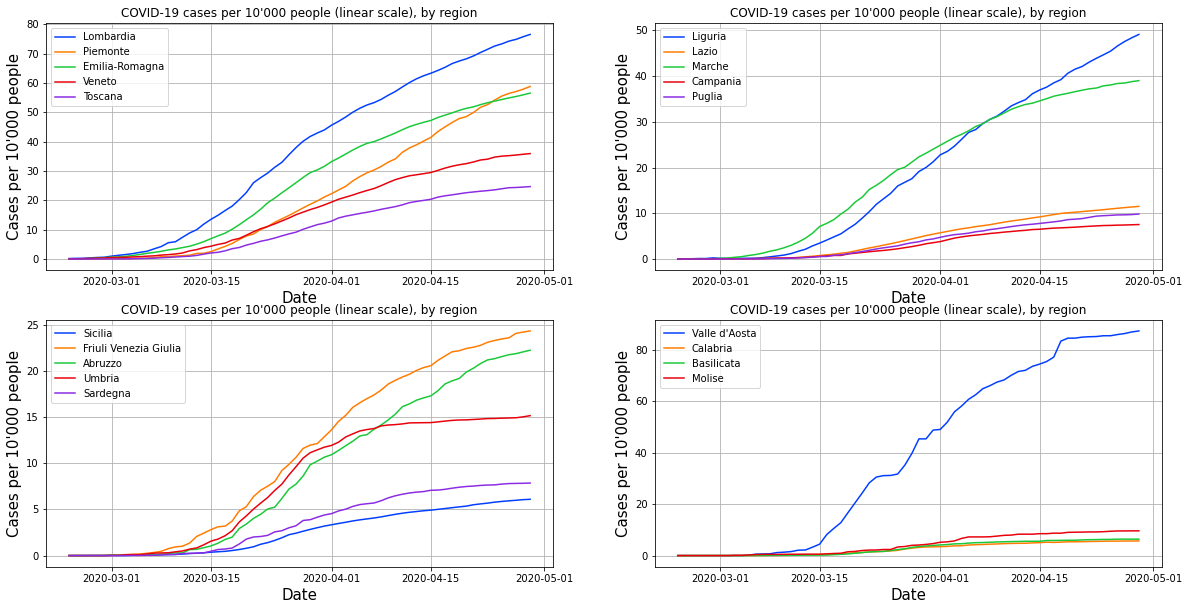

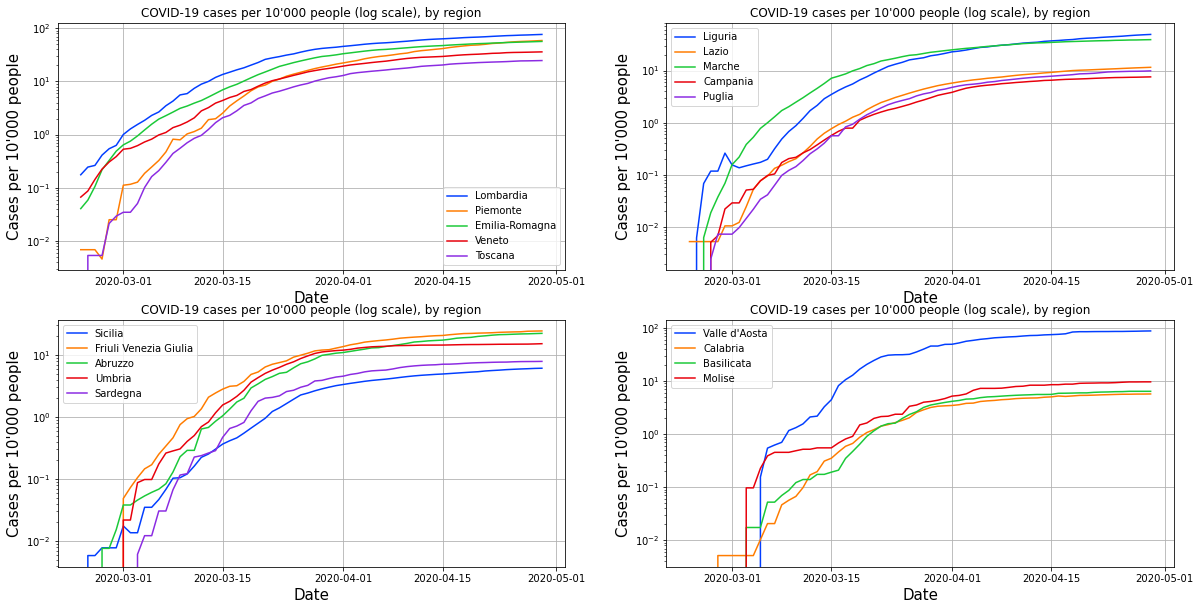

In [23]:
make_plot(dataset=conf_population_norm, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="COVID-19 cases per 10'000 people (linear scale), by region",
          xlabel="Date", ylabel="Cases per 10'000 people")

make_plot(dataset=conf_population_norm, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="COVID-19 cases per 10'000 people (log scale), by region",
          xlabel="Date", ylabel="Cases per 10'000 people",
         logy=True)

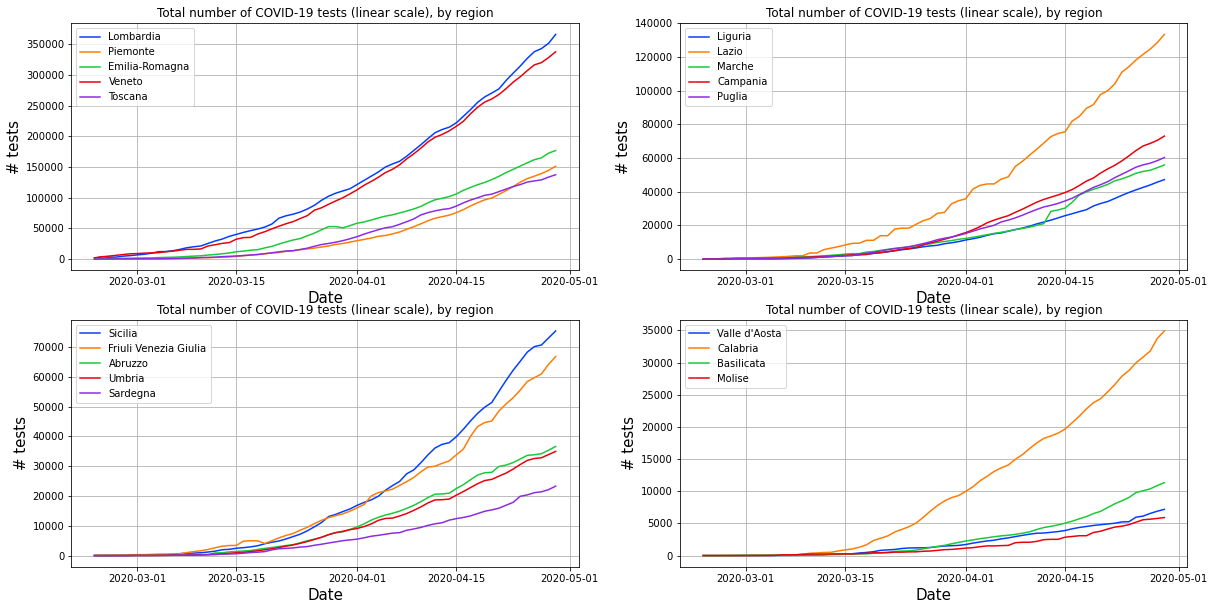

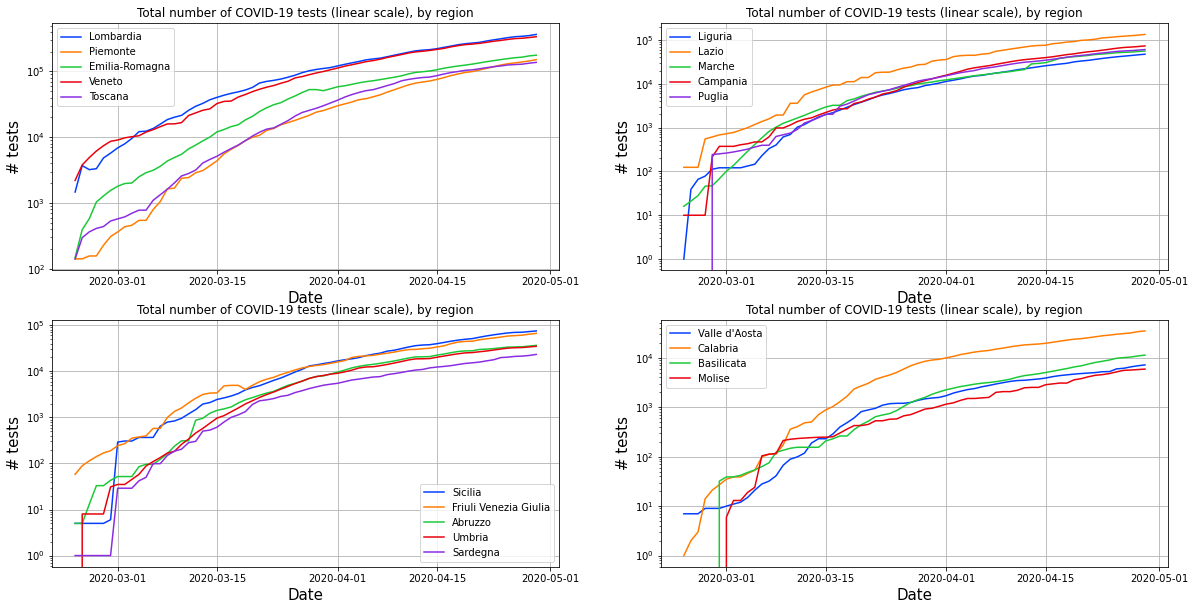

In [24]:
make_plot(dataset=tests, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Total number of COVID-19 tests (linear scale), by region",
          xlabel="Date", ylabel="# tests")

make_plot(dataset=tests, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Total number of COVID-19 tests (linear scale), by region",
          xlabel="Date", ylabel="# tests",
         logy=True)

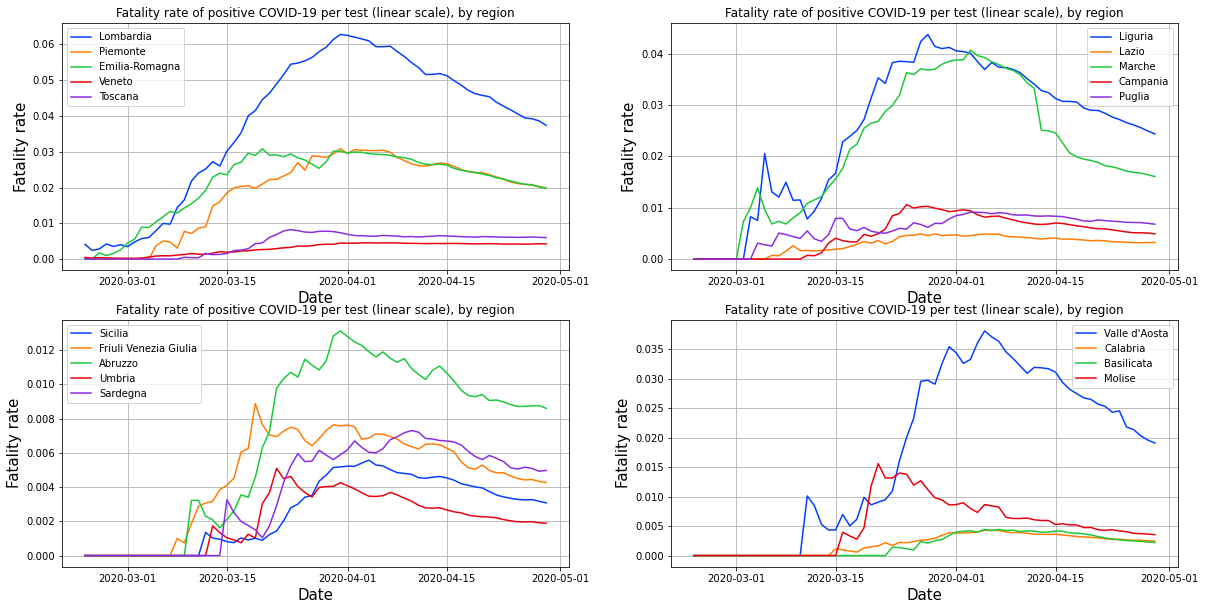

In [25]:
fatality_per_test = deaths.divide(tests.replace(0, 1))

make_plot(dataset=fatality_per_test, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Fatality rate of positive COVID-19 per test (linear scale), by region",
          xlabel="Date", ylabel="Fatality rate")

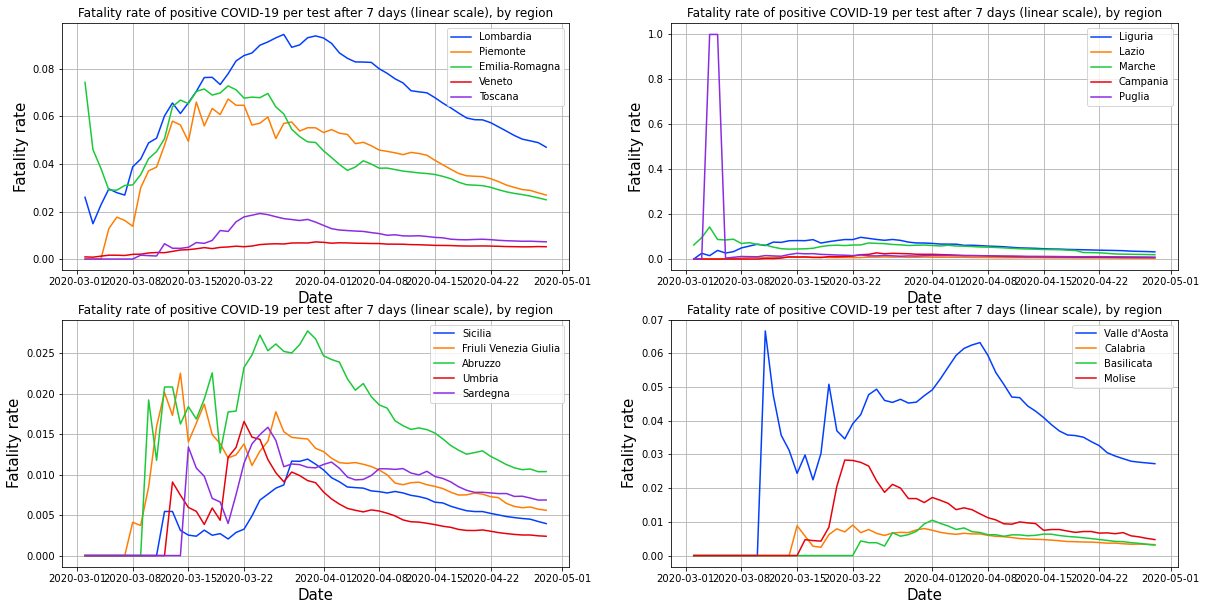

In [26]:
tests_7d_ago = tests[tests.columns.values].shift(7)
tests_7d_ago = tests_7d_ago.dropna()

fatality_after_7d_per_test = deaths.divide(tests_7d_ago.replace(0, 1))

make_plot(dataset=fatality_after_7d_per_test, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Fatality rate of positive COVID-19 per test after 7 days (linear scale), by region",
          xlabel="Date", ylabel="Fatality rate")

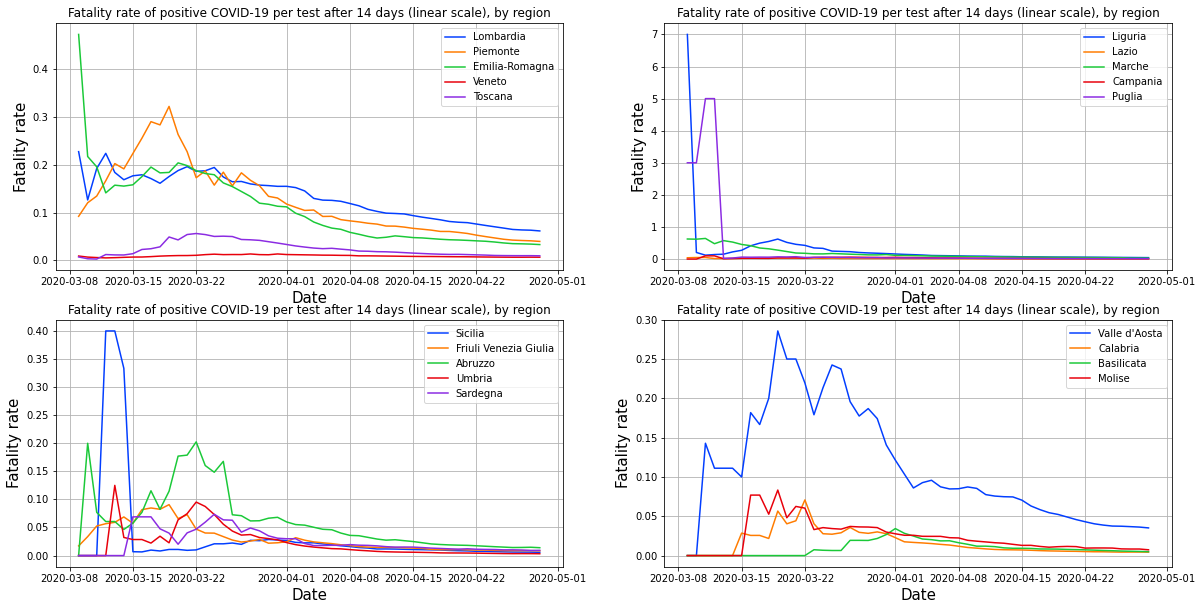

In [27]:
tests_14d_ago = tests[tests.columns.values].shift(14)
tests_14d_ago = tests_14d_ago.dropna()

fatality_after_14d_per_test = deaths.divide(tests_14d_ago.replace(0, 1))

make_plot(dataset=fatality_after_14d_per_test, nrow=2,ncol=2, 
          contries_ordered=contries_ordered2, plot_countries_opt=2,
          title="Fatality rate of positive COVID-19 per test after 14 days (linear scale), by region",
          xlabel="Date", ylabel="Fatality rate")

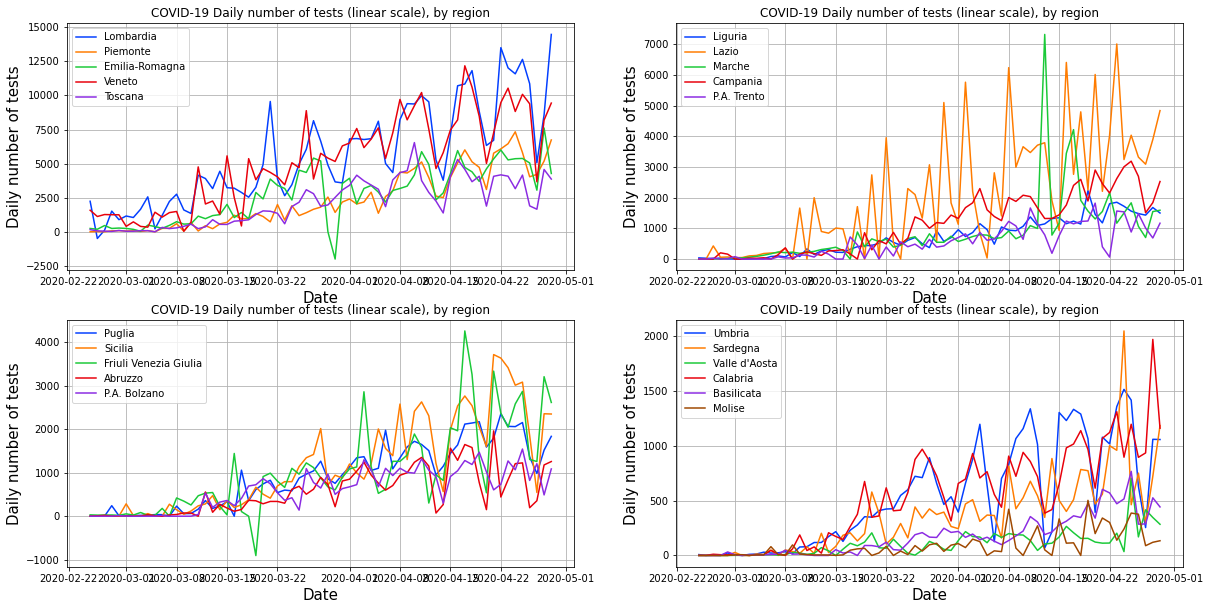

In [28]:
tests_daily = tests - tests.shift(1)

make_plot(dataset=tests_daily, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='COVID-19 Daily number of tests (linear scale), by region',
          xlabel="Date", ylabel="Daily number of tests")

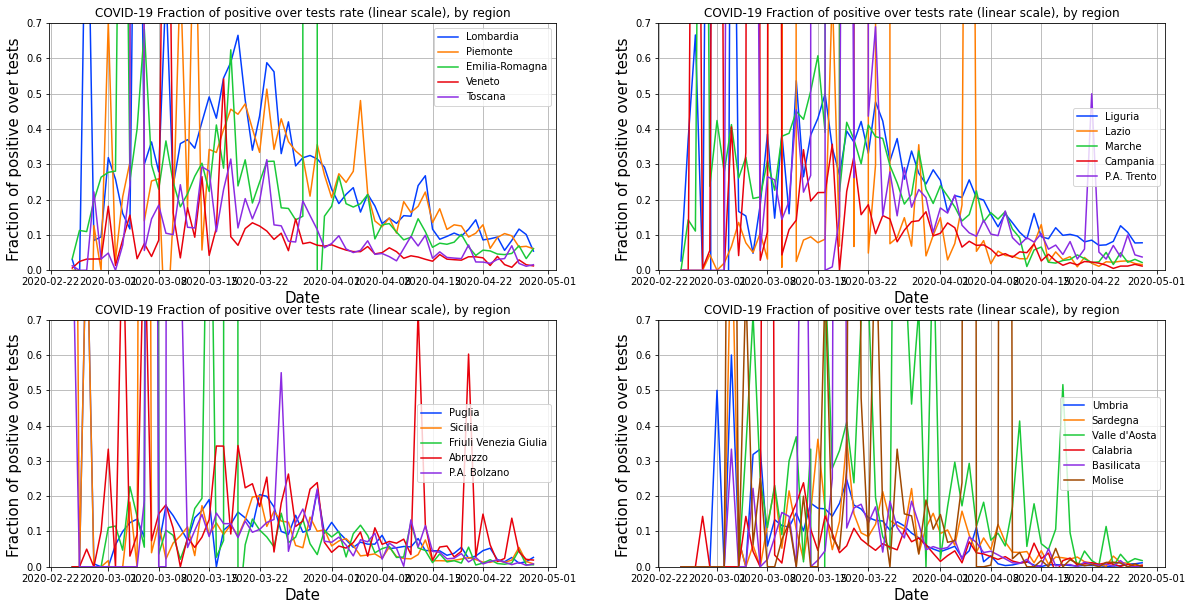

In [29]:
positive_per_test = conf_daily.divide(tests_daily.replace(0, 1))

make_plot(dataset=positive_per_test, nrow=2,ncol=2, contries_ordered=contries_ordered,
          title='COVID-19 Fraction of positive over tests rate (linear scale), by region',
          xlabel="Date", ylabel="Fraction of positive over tests ", ymin=-0.00001, ymax=0.7)